# Clasificación de Calidad del Vino

## Objetivo
Utilizar técnicas de clasificación para predecir la calidad del vino basándose en características físico-químicas.

## Dataset: Wine Quality Dataset
Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada.

## 1. Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Carga y Exploración de Datos

In [2]:
# Cargar el dataset
df = pd.read_csv('WineQT.csv')

# Estructura básica del dataset
print("Forma del dataset:", df.shape)
print("\nPrimeras 5 filas:")
df.head()

Forma del dataset: (1143, 13)

Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [24]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [25]:
# Limpiar nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [26]:
# Estadísticas descriptivas
df.describe().round(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
count,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000,1143.000
mean,8.311,0.531,0.268,2.532,0.087,15.615,45.915,0.997,3.311,0.658,10.442,5.657,804.969
std,1.748,0.180,0.197,1.356,0.047,10.250,32.782,0.002,0.157,0.170,1.082,0.806,463.997
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.205,0.550,9.500,5.000,411.000
50%,7.900,0.520,0.250,2.200,0.079,13.000,37.000,0.997,3.310,0.620,10.200,6.000,794.000
75%,9.100,0.640,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.730,11.100,6.000,1209.500
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


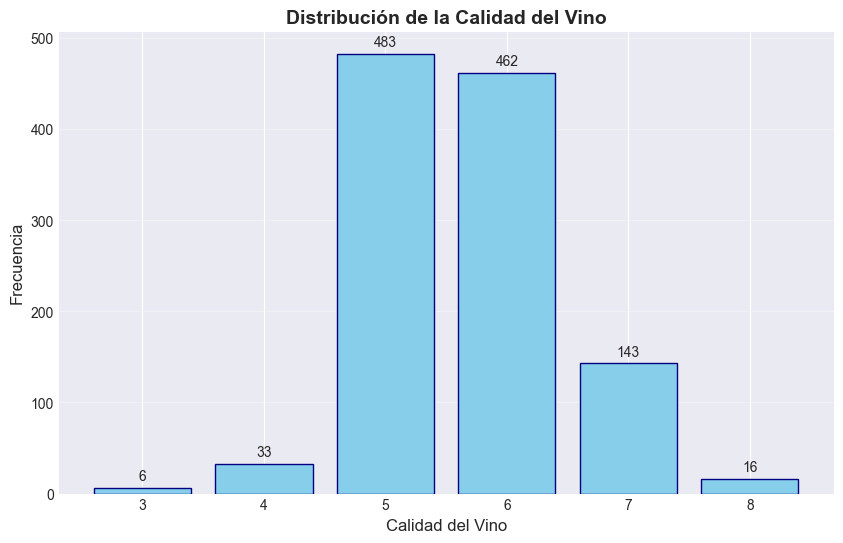


Distribución de calidad:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

Porcentaje por clase:
quality
3     0.52
4     2.89
5    42.26
6    40.42
7    12.51
8     1.40
Name: count, dtype: float64


In [ ]:
# Distribución de la variable, para guiarme
plt.figure(figsize=(10, 6))
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values, color='skyblue', edgecolor='navy')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 5, str(v), ha='center', va='bottom')

plt.show()

print("\nDistribución de calidad:")
print(quality_counts)
print(f"\nPorcentaje por clase:")
print((quality_counts / len(df) * 100).round(2))

### 2.1 Identificación de Valores Nulos y Duplicados

In [7]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")

# Verificar duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")

Valores nulos por columna:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
id                      0
dtype: int64

Total de valores nulos: 0

Número de filas duplicadas: 0


### 2.3 Análisis de Correlación

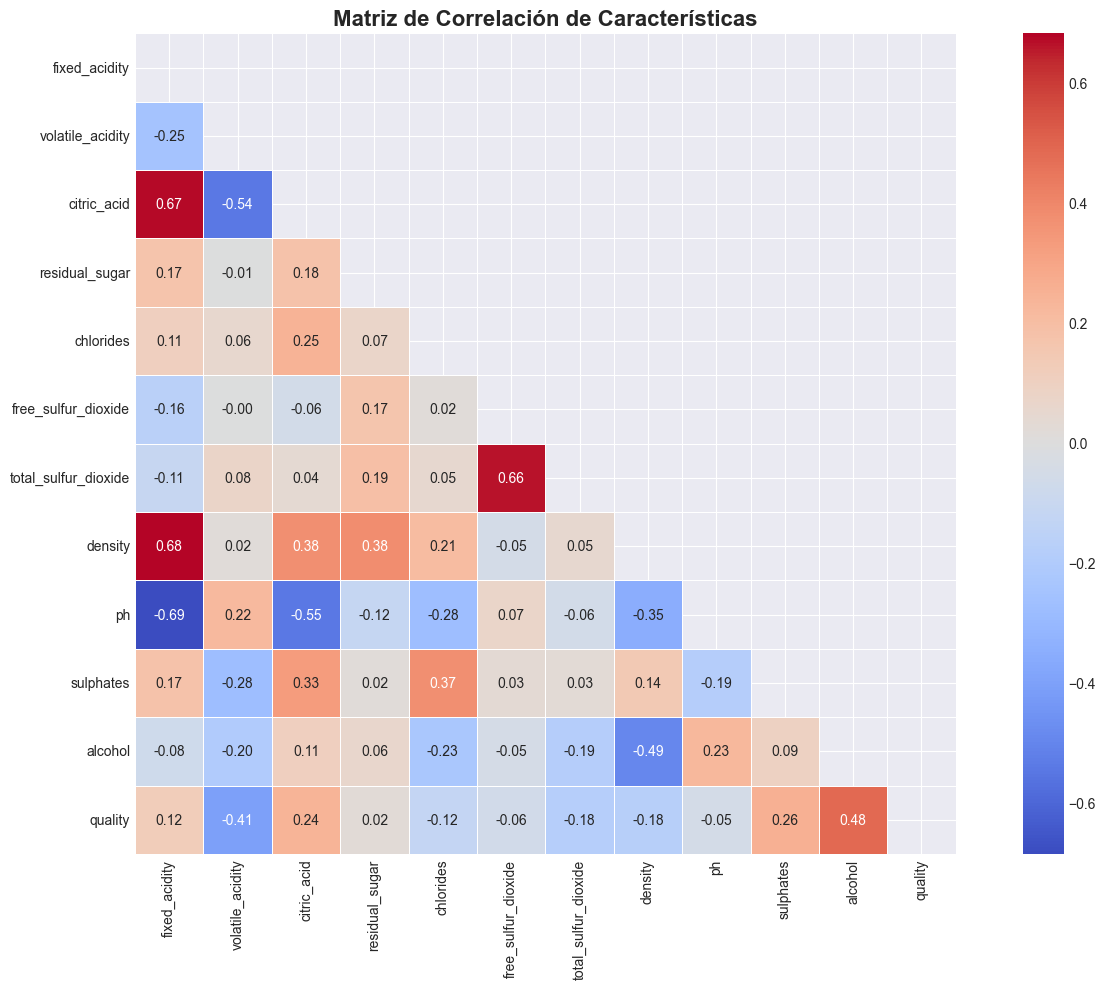


Correlación con la calidad del vino:
alcohol: 0.485
sulphates: 0.258
citric_acid: 0.241
fixed_acidity: 0.122
residual_sugar: 0.022
ph: -0.052
free_sulfur_dioxide: -0.063
chlorides: -0.124
density: -0.175
total_sulfur_dioxide: -0.183
volatile_acidity: -0.407


In [10]:
# Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = df.drop(columns=['id']).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, fmt='.2f', square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Características', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo
quality_corr = df.drop(columns=['id']).corr()['quality'].sort_values(ascending=False)
print("\nCorrelación con la calidad del vino:")
print("=" * 40)
for feature, corr in quality_corr.items():
    if feature != 'quality':
        print(f"{feature}: {corr:.3f}")

## 3. Preprocesamiento de Datos

In [28]:
# Separar características y variable objetivo
X = df.drop(columns=['quality', 'id'])
y = df['quality']


In [29]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 4. Entrenamiento de Modelos de Clasificación

### 4.1 K-Nearest Neighbors (KNN)

In [31]:
# Pipeline para KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Parámetros para GridSearchCV
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# GridSearchCV con validación cruzada
print("Entrenando KNN con GridSearchCV...")
knn_grid = GridSearchCV(
    knn_pipeline, 
    knn_params, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train, y_train)

Entrenando KNN con GridSearchCV...
Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'classifier__n_neighbors': [3, 5, ...], 'classifier__p': [1, 2], 'classifier__weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


### 4.2 Random Forest

In [ ]:
# Pipeline para Random Forest
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parámetros para GridSearchCV
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV con validación cruzada
print("Entrenando Random Forest con GridSearchCV...")
rf_grid = GridSearchCV(
    rf_pipeline, 
    rf_params, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

Entrenando Random Forest con GridSearchCV...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Mejores parámetros Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Mejor score CV: 0.6543


### 4.3 Regresión Logística

In [33]:
# Pipeline para Regresión Logística
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Parámetros para GridSearchCV
lr_params = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# GridSearchCV con validación cruzada
print("Entrenando Regresión Logística con GridSearchCV...")
lr_grid = GridSearchCV(
    lr_pipeline, 
    lr_params, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)

print(f"\nMejores parámetros Regresión Logística: {lr_grid.best_params_}")
print(f"Mejor score CV: {lr_grid.best_score_:.4f}")

Entrenando Regresión Logística con GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Mejores parámetros Regresión Logística: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Mejor score CV: 0.5876


## 5. Evaluación de Modelos

In [34]:
# Función para evaluar modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    print(f"\n{'='*50}")
    print(f"EVALUACIÓN DE {model_name.upper()}")
    print(f"{'='*50}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    
    # Informe de clasificación
    print(f"\nInforme de Clasificación:")
    print(classification_report(y_test, y_pred, 
                              target_names=[f'Calidad {i}' for i in sorted(y_test.unique())]))
    
    return y_pred, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Evaluar todos los modelos
models = {
    'KNN': knn_grid.best_estimator_,
    'Random Forest': rf_grid.best_estimator_,
    'Logistic Regression': lr_grid.best_estimator_
}

predictions = {}
results = {}

for name, model in models.items():
    y_pred, metrics = evaluate_model(model, X_test, y_test, name)
    predictions[name] = y_pred
    results[name] = metrics


EVALUACIÓN DE KNN
Accuracy: 0.6856
Precision (weighted): 0.6552
Recall (weighted): 0.6856
F1-Score (weighted): 0.6645

Informe de Clasificación:
              precision    recall  f1-score   support

   Calidad 3       0.00      0.00      0.00         1
   Calidad 4       0.00      0.00      0.00         7
   Calidad 5       0.73      0.80      0.76        97
   Calidad 6       0.63      0.72      0.67        92
   Calidad 7       0.72      0.45      0.55        29
   Calidad 8       0.00      0.00      0.00         3

    accuracy                           0.69       229
   macro avg       0.35      0.33      0.33       229
weighted avg       0.66      0.69      0.66       229


EVALUACIÓN DE RANDOM FOREST
Accuracy: 0.7118
Precision (weighted): 0.6779
Recall (weighted): 0.7118
F1-Score (weighted): 0.6892

Informe de Clasificación:
              precision    recall  f1-score   support

   Calidad 3       0.00      0.00      0.00         1
   Calidad 4       0.00      0.00      0.00   

### 5.1 Matrices de Confusión

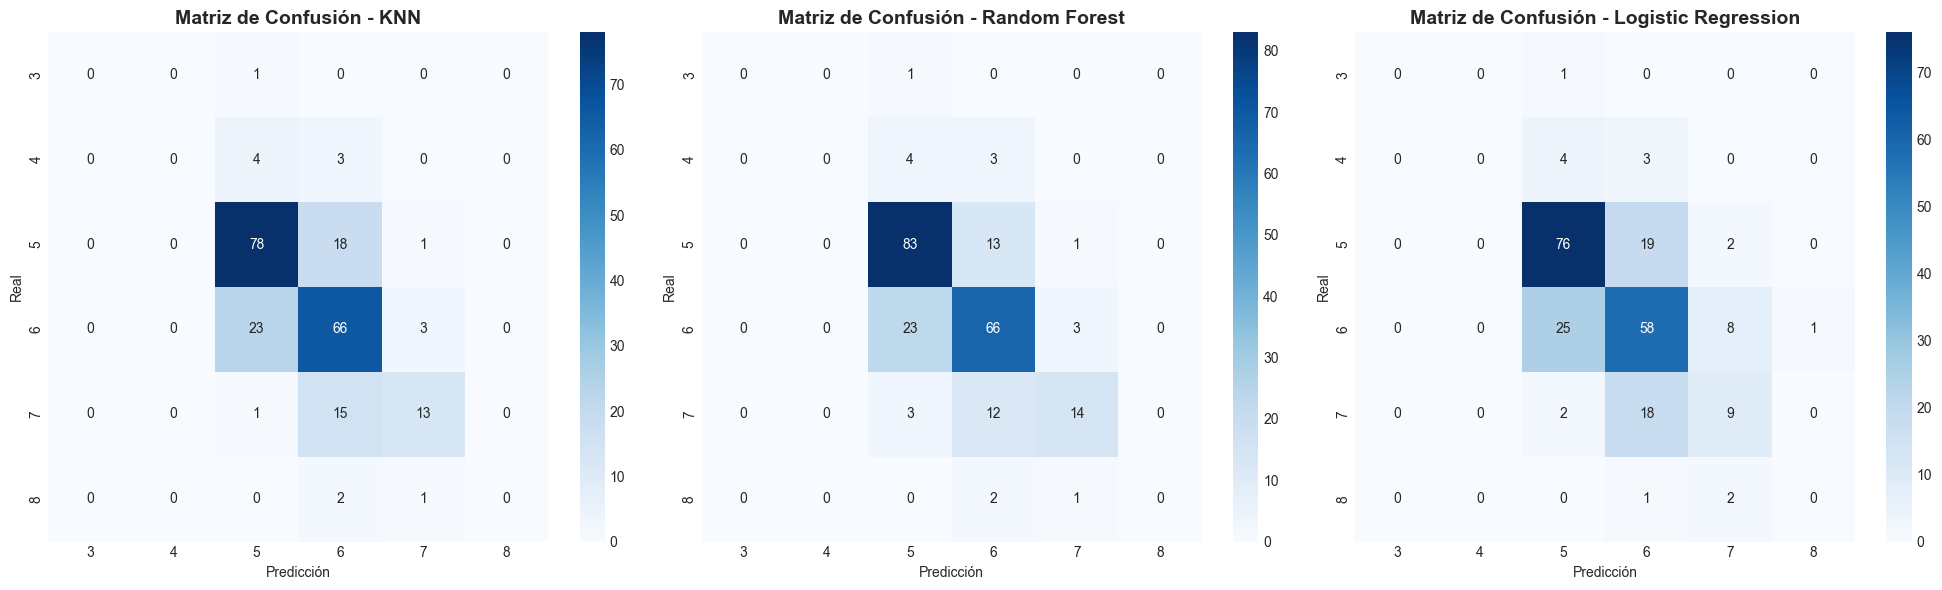

In [35]:
# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, (name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'Matriz de Confusión - {name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')
    
    # Etiquetas de clases
    classes = sorted(y_test.unique())
    axes[idx].set_xticklabels(classes)
    axes[idx].set_yticklabels(classes)

plt.tight_layout()
plt.show()

### 5.2 Comparación de Métricas

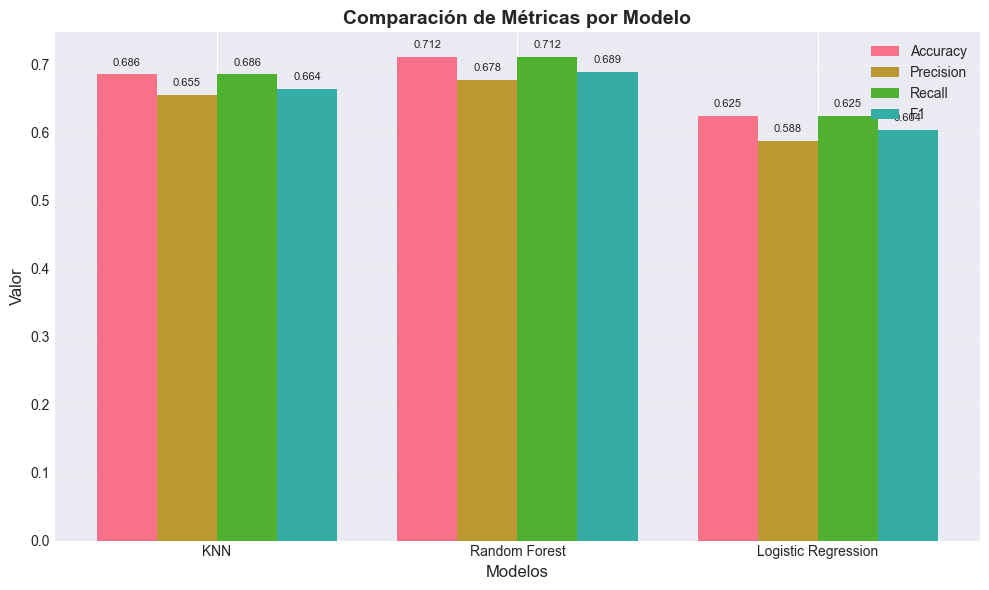


Tabla Resumen de Métricas:
                     accuracy  precision  recall      f1
KNN                    0.6856     0.6552  0.6856  0.6645
Random Forest          0.7118     0.6779  0.7118  0.6892
Logistic Regression    0.6245     0.5877  0.6245  0.6037


In [36]:
# DataFrame con resultados
df_results = pd.DataFrame(results).T
df_results = df_results.round(4)

# Visualización de métricas
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(df_results.index))
width = 0.2
metrics = df_results.columns

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, df_results[metric], width, label=metric.capitalize())

ax.set_xlabel('Modelos', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(df_results.index)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, metric in enumerate(metrics):
    for j, (idx, value) in enumerate(df_results[metric].items()):
        ax.text(j + i*width, value + 0.01, f'{value:.3f}', 
               ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\nTabla Resumen de Métricas:")
print(df_results)

### 5.3 Curva ROC y AUC para el Mejor Modelo

Mejor modelo basado en accuracy: Random Forest


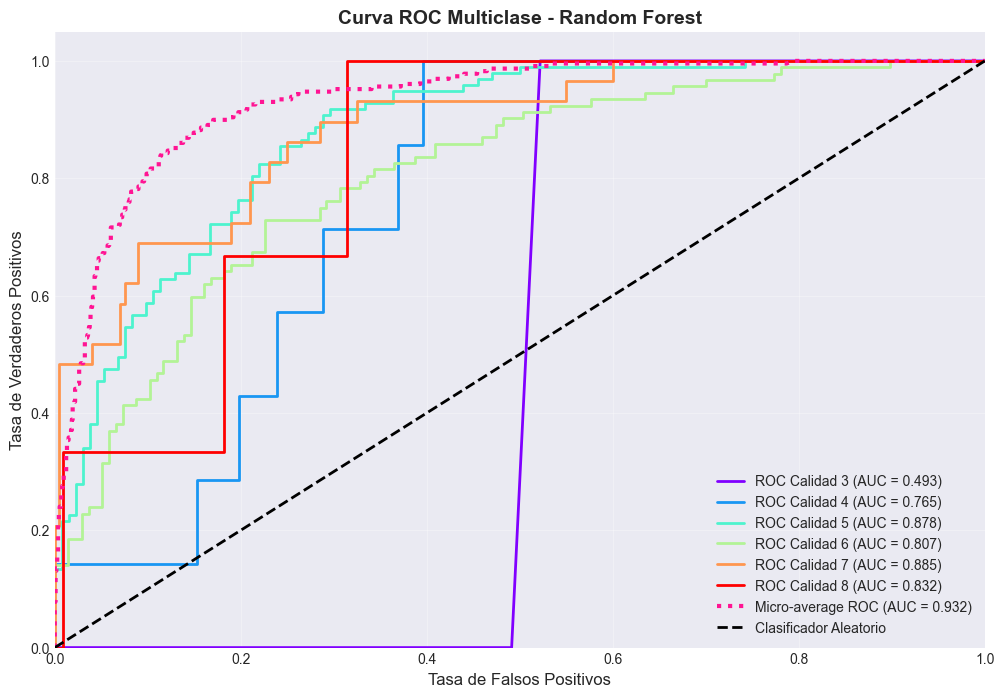


AUC Micro-average: 0.9317


In [19]:
# Identificar el mejor modelo
best_model_name = df_results['accuracy'].idxmax()
best_model = models[best_model_name]
print(f"Mejor modelo basado en accuracy: {best_model_name}")

# Obtener probabilidades de predicción
y_score = best_model.predict_proba(X_test)
classes = sorted(y_test.unique())
n_classes = len(classes)

# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=classes)

# Calcular ROC curve y AUC para cada clase
plt.figure(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_classes))

# ROC para cada clase
for i, color in enumerate(colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'ROC Calidad {classes[i]} (AUC = {roc_auc:.3f})')

# Micro-average ROC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle=':', lw=3,
         label=f'Micro-average ROC (AUC = {roc_auc_micro:.3f})')

# Línea diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Clasificador Aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
plt.title(f'Curva ROC Multiclase - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

print(f"\nAUC Micro-average: {roc_auc_micro:.4f}")

## 6. Análisis y Comparación de Resultados

In [37]:
# Análisis detallado de resultados
print("="*70)
print("ANÁLISIS DETALLADO DE RESULTADOS")
print("="*70)

# Ranking de modelos
ranking = df_results.sort_values('accuracy', ascending=False)
print("\nRanking de modelos por accuracy:")
for idx, (model, metrics) in enumerate(ranking.iterrows()):
    print(f"\n{idx+1}. {model}:")
    print(f"   - Accuracy: {metrics['accuracy']:.4f}")
    print(f"   - F1-Score: {metrics['f1']:.4f}")

# Fortalezas y debilidades
print("\n" + "="*70)
print("FORTALEZAS Y DEBILIDADES POR MODELO")
print("="*70)

print("\n1. K-NEAREST NEIGHBORS (KNN):")
print("   Fortalezas:")
print("   ✓ Simple e intuitivo")
print("   ✓ No hace suposiciones sobre la distribución de datos")
print("   ✓ Efectivo con datos no lineales")
print("   Debilidades:")
print("   ✗ Sensible a la escala de las características")
print("   ✗ Computacionalmente costoso en predicción")
print("   ✗ Sensible a la maldición de la dimensionalidad")

print("\n2. RANDOM FOREST:")
print("   Fortalezas:")
print("   ✓ Maneja bien el overfitting")
print("   ✓ Proporciona importancia de características")
print("   ✓ Robusto ante outliers")
print("   Debilidades:")
print("   ✗ Puede ser lento con muchos árboles")
print("   ✗ Difícil de interpretar (caja negra)")
print("   ✗ Requiere más memoria")

print("\n3. REGRESIÓN LOGÍSTICA:")
print("   Fortalezas:")
print("   ✓ Rápido y eficiente")
print("   ✓ Proporciona probabilidades")
print("   ✓ Fácil de interpretar")
print("   Debilidades:")
print("   ✗ Asume relaciones lineales")
print("   ✗ Puede tener problemas con multicolinealidad")
print("   ✗ Limitado para problemas no lineales")

ANÁLISIS DETALLADO DE RESULTADOS

Ranking de modelos por accuracy:

1. Random Forest:
   - Accuracy: 0.7118
   - F1-Score: 0.6892

2. KNN:
   - Accuracy: 0.6856
   - F1-Score: 0.6645

3. Logistic Regression:
   - Accuracy: 0.6245
   - F1-Score: 0.6037

FORTALEZAS Y DEBILIDADES POR MODELO

1. K-NEAREST NEIGHBORS (KNN):
   Fortalezas:
   ✓ Simple e intuitivo
   ✓ No hace suposiciones sobre la distribución de datos
   ✓ Efectivo con datos no lineales
   Debilidades:
   ✗ Sensible a la escala de las características
   ✗ Computacionalmente costoso en predicción
   ✗ Sensible a la maldición de la dimensionalidad

2. RANDOM FOREST:
   Fortalezas:
   ✓ Maneja bien el overfitting
   ✓ Proporciona importancia de características
   ✓ Robusto ante outliers
   Debilidades:
   ✗ Puede ser lento con muchos árboles
   ✗ Difícil de interpretar (caja negra)
   ✗ Requiere más memoria

3. REGRESIÓN LOGÍSTICA:
   Fortalezas:
   ✓ Rápido y eficiente
   ✓ Proporciona probabilidades
   ✓ Fácil de interpretar


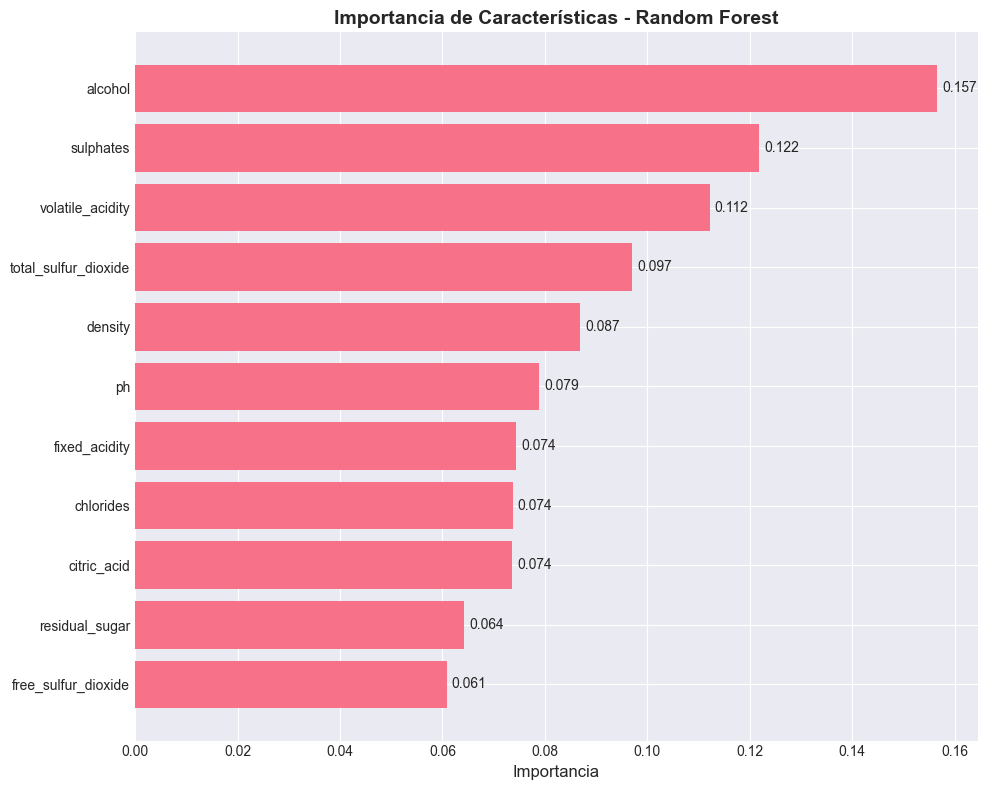


Importancia de características:
                 feature  importance
10               alcohol    0.156619
9              sulphates    0.121762
1       volatile_acidity    0.112161
6   total_sulfur_dioxide    0.096983
7                density    0.086883
8                     ph    0.078900
0          fixed_acidity    0.074430
4              chlorides    0.073709
2            citric_acid    0.073554
3         residual_sugar    0.064214
5    free_sulfur_dioxide    0.060784


In [21]:
# Importancia de características (para Random Forest)
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_importance = rf_model.named_steps['classifier'].feature_importances_
    
    # Crear DataFrame de importancia
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    # Visualizar importancia de características
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['feature'], importance_df['importance'])
    plt.xlabel('Importancia', fontsize=12)
    plt.title('Importancia de Características - Random Forest', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Añadir valores
    for idx, (feat, imp) in enumerate(zip(importance_df['feature'], importance_df['importance'])):
        plt.text(imp + 0.001, idx, f'{imp:.3f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print("\nImportancia de características:")
    print(importance_df)

## 7. Conclusiones

In [22]:
print("="*70)
print("CONCLUSIONES FINALES")
print("="*70)

print(f"\n1. MEJOR MODELO: {best_model_name}")
print(f"   - Accuracy: {df_results.loc[best_model_name, 'accuracy']:.4f}")
print(f"   - F1-Score: {df_results.loc[best_model_name, 'f1']:.4f}")

print("\n2. HALLAZGOS CLAVE:")
print("   • Las características más importantes para predecir la calidad del vino son:")
if 'Random Forest' in models:
    top_features = importance_df.head(3)
    for _, row in top_features.iterrows():
        print(f"     - {row['feature']}: {row['importance']:.3f}")

print("\n   • Todos los modelos tienen dificultades para distinguir entre calidades cercanas")
print("   • La distribución desbalanceada de clases afecta el rendimiento")

print("\n3. RECOMENDACIONES:")
print("   • Considerar técnicas de balanceo de clases (SMOTE, undersampling)")
print("   • Explorar feature engineering adicional")
print("   • Probar métodos de ensemble como Voting o Stacking")
print("   • Considerar agrupar calidades similares (ej: baja, media, alta)")

print("\n4. LIMITACIONES:")
print("   • Dataset relativamente pequeño")
print("   • Clases desbalanceadas")
print("   • Posible subjetividad en las calificaciones de calidad")

CONCLUSIONES FINALES

1. MEJOR MODELO: Random Forest
   - Accuracy: 0.7118
   - F1-Score: 0.6892

2. HALLAZGOS CLAVE:
   • Las características más importantes para predecir la calidad del vino son:
     - alcohol: 0.157
     - sulphates: 0.122
     - volatile_acidity: 0.112

   • Todos los modelos tienen dificultades para distinguir entre calidades cercanas
   • La distribución desbalanceada de clases afecta el rendimiento

3. RECOMENDACIONES:
   • Considerar técnicas de balanceo de clases (SMOTE, undersampling)
   • Explorar feature engineering adicional
   • Probar métodos de ensemble como Voting o Stacking
   • Considerar agrupar calidades similares (ej: baja, media, alta)

4. LIMITACIONES:
   • Dataset relativamente pequeño
   • Clases desbalanceadas
   • Posible subjetividad en las calificaciones de calidad


## 8. Guardar Modelos y Resultados

In [23]:
import joblib
import os

# Crear directorio para guardar modelos
if not os.path.exists('models'):
    os.makedirs('models')

# Guardar modelos
for name, model in models.items():
    filename = f"models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Modelo {name} guardado en: {filename}")

# Guardar resultados
df_results.to_csv('model_results.csv')
print("\nResultados guardados en: model_results.csv")

# Guardar predicciones
predictions_df = pd.DataFrame(predictions)
predictions_df['actual'] = y_test.values
predictions_df.to_csv('model_predictions.csv', index=False)
print("Predicciones guardadas en: model_predictions.csv")

Modelo KNN guardado en: models/knn_model.pkl
Modelo Random Forest guardado en: models/random_forest_model.pkl
Modelo Logistic Regression guardado en: models/logistic_regression_model.pkl

Resultados guardados en: model_results.csv
Predicciones guardadas en: model_predictions.csv
